In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saurabhshahane/fake-news-classification")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fake-news-classification' dataset.
Path to dataset files: /kaggle/input/fake-news-classification


In [ ]:
import os
import pandas as pd

In [ ]:
files = os.listdir(path)
csv_file = [f for f in files if f.endswith('.csv')][0]
df = pd.read_csv(os.path.join(path, csv_file))

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB
None
   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2 

In [ ]:
import re
def cleantext(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

df['content'] = df['content'].apply(cleantext)

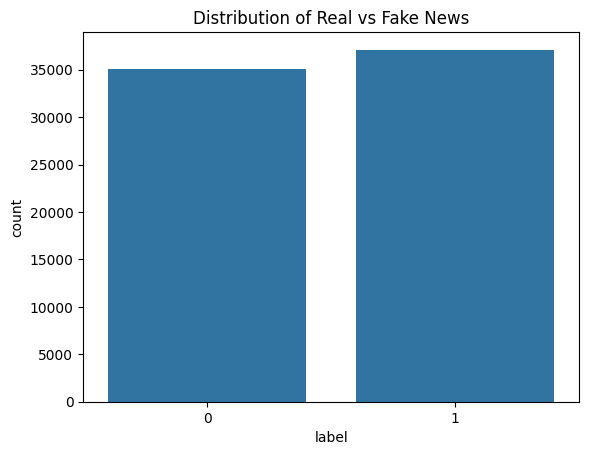

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=df)
plt.title('Distribution of Real vs Fake News')
plt.show()

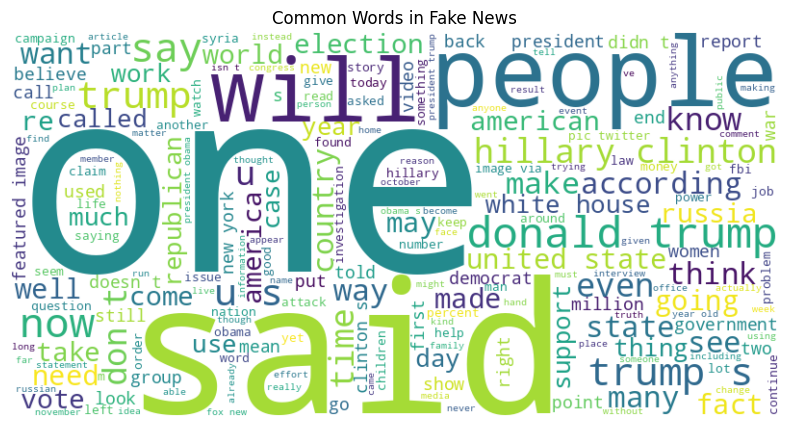

In [ ]:
from wordcloud import WordCloud

fake_news_text = " ".join(df[df['label'] == 1]['content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_news_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Fake News')
plt.show()

In [ ]:
df['length'] = df['content'].apply(len)
sns.boxplot(x=df['length'])
plt.title('Text Length Distribution')
plt.show()

In [ ]:
df = df.fillna('')
df['content'] = df['title'] + ' ' + df['text']
x = df['content']
y = df['label']

print(x.head())

0    LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1       Did they post their votes for Hillary already?
2    UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3    Bobby Jindal, raised Hindu, uses story of Chri...
4    SATAN 2: Russia unvelis an image of its terrif...
Name: content, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

model = PassiveAggressiveClassifier(max_iter=50)
model.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [ ]:
medical_test_claims = [
    "A common household spice like termaric cures cancer instantly.",
    "The Central Drugs Standard Control Organisation approved a new drug for diabetes management today.",
    "New study shows vaccines cause immediate genetic mutations.",
    "Hospitals report a decline in seasonal flu cases this month."
]

# Transform the claims using your existing vectorizer
test_vectors = tfidf_vectorizer.transform(medical_test_claims)

# Predict
test_predictions = model.predict(test_vectors)

for claim, prediction in zip(medical_test_claims, test_predictions):
    result = "FAKE" if prediction == 1 else "REAL"
    print(f"Claim: {claim} -> Result: {result}")

Claim: A common household spice like termaric cures cancer instantly. -> Result: FAKE
Claim: The Central Drugs Standard Control Organisation approved a new drug for diabetes management today. -> Result: FAKE
Claim: New study shows vaccines cause immediate genetic mutations. -> Result: FAKE
Claim: Hospitals report a decline in seasonal flu cases this month. -> Result: FAKE


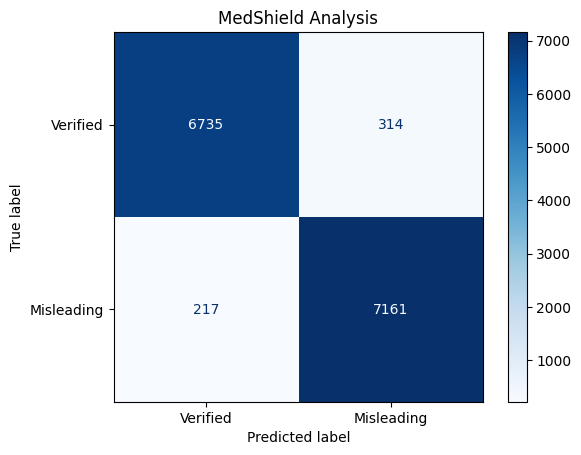

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

xtest = tfidf_test
ytest = y_test
pred = model.predict(xtest)
matrix = confusion_matrix(ytest, pred)
graph = ConfusionMatrixDisplay(matrix, display_labels=["Verified", "Misleading"])
graph.plot(cmap=plt.cm.Blues)
plt.title("MedShield Analysis")
plt.show()

In [21]:
from google.colab import files

files.download('model.pkl')
files.download('vectorizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
import pickle

pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(tfidf_vectorizer, open('vectorizer.pkl', 'wb'))